In [1]:
import pandas as pd
import numpy as np
import torch

from models.SP import SP
from models.ADP import ADP
from models.I import I

from utils.parse_data import parse_paper_data
from utils.preprocess_data import process_raw

In [2]:
paper1_columns = ['Name', 'q1', 'q2', 'q3',
                      'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14',
                      'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24']
paper2_columns = ['Name.1', 'q1.1', 'q2.1', 'q3.1',
                    'q4.1', 'q5.1', 'q6.1', 'q7.1', 'q8.1', 'q9.1', 'q10.1', 'q11.1',
                    'q12.1', 'q13.1', 'q14.1', 'q15.1', 'q16.1', 'q17.1', 'q18.1', 'q19.1',
                    'q20.1', 'q21.1', 'q22.1', 'q23.1']
paper3_columns = ['Name.2', 'q1.2', 'q2.2', 'q3.2', 'q4.2', 'q5.2', 'q6.2',
                    'q7.2', 'q8.2', 'q9.2', 'q10.2', 'q11.2', 'q12.2', 'q13.2', 'q14.2',
                    'q15.2', 'q16.2', 'q17.2', 'q18.2', 'q19.2', 'q20.2', 'q21.2', 'q22.2',
                    'q23.2']

csv_path = "Fwd__Pinpoint_ML_Dataset\9to1_2017_GCSE_1H_and_2H_and_3H Linked Pinpoint Data_Cleaned.csv"
raw_data = pd.read_csv(csv_path, low_memory=False)
data_start_row = 6

# Process data
exam_data_df, meta_data_df = parse_paper_data(raw_data, data_start_row, paper1_columns)
exam_data_df, _ = process_raw(exam_data_df, meta_data_df, binarise_method='mid', shuffle=True)

exam_data_df2, meta_data_df2 = parse_paper_data(raw_data, data_start_row, paper2_columns)
exam_data_df2, _ = process_raw(exam_data_df2, meta_data_df2, binarise_method='mid', shuffle=True)

combined_df = pd.concat([exam_data_df, exam_data_df2], axis=1)
combined_ts = torch.clone(torch.tensor(combined_df.values))

S, Q = combined_ts.shape[0], combined_ts.shape[1]

In [115]:
qtype1 = meta_data_df.loc['qtype'].astype(int)
qtype2 = meta_data_df2.loc['qtype'].astype(int)

lookup_csv_path = "Fwd__Pinpoint_ML_Dataset\lookup table of question types, names and strands.csv"
lookup_data = pd.read_csv(lookup_csv_path, usecols=[1,3], low_memory=False)
lookup_data = lookup_data.set_index('id')
# orig_labels = ['D','N','N','A','S','A','D','N','N','A','A','A','A','R','R',

cat1 = np.array(lookup_data.loc[qtype1]['Category'])
idx1 = np.array([6,23,4,7,24,21,3,18,19,17,15,11,16,5,12,13,10,9,14,22,2,1,8,20]) - 1
cat1 = cat1[idx1]

cat2 = np.array(lookup_data.loc[qtype2]['Category'])
idx2 = np.array([6,22,4,7,19,23,3,17,15,16,18,11,5,12,13,10,9,14,21,2,1,8,20]) - 1
cat2 = cat2[idx2]
category = np.concatenate([cat1, cat2])


diff1 = meta_data_df.loc['Difficulty'].astype(int)
diff1 = np.array(diff1)
diff1 = diff1[idx1]

diff2 = meta_data_df2.loc['Difficulty'].astype(int)
diff2 = np.array(diff2)
diff2 = diff2[idx2]

diff = np.concatenate([diff1, diff2])

[2 3 3 2 3 3 1 1 1 3 1 1 3 2 1 1 1 1 1 1 1 1 1 3 2 1 3 2 2 2 2 1 3 3 3 1 2
 2 3 2 3 1 3 3 1 2 3]


In [3]:
# my_SP = SP(combined_ts, [0, 15000], [30, Q])
# my_SP.mass_run()

0 tensor(1194524.7500, grad_fn=<NegBackward0>) tensor(132735.3906, grad_fn=<NegBackward0>) 60.12784242630005
25 tensor(750390.5000, grad_fn=<NegBackward0>) tensor(83257.2188, grad_fn=<NegBackward0>) 65.26392102241516
50 tensor(735585.6875, grad_fn=<NegBackward0>) tensor(81783.9766, grad_fn=<NegBackward0>) 65.34313559532166
75 tensor(721626.1875, grad_fn=<NegBackward0>) tensor(80394.6562, grad_fn=<NegBackward0>) 65.65333604812622
100 tensor(708474.9375, grad_fn=<NegBackward0>) tensor(79085.9297, grad_fn=<NegBackward0>) 65.8823549747467
125 tensor(696093.8125, grad_fn=<NegBackward0>) tensor(77854.0547, grad_fn=<NegBackward0>) 66.05921387672424
150 tensor(684444.3125, grad_fn=<NegBackward0>) tensor(76695.2734, grad_fn=<NegBackward0>) 66.28745198249817
175 tensor(673488.1250, grad_fn=<NegBackward0>) tensor(75605.8125, grad_fn=<NegBackward0>) 66.56705737113953
200 tensor(663187.3750, grad_fn=<NegBackward0>) tensor(74581.9375, grad_fn=<NegBackward0>) 66.7521595954895
225 tensor(653504.7500, 

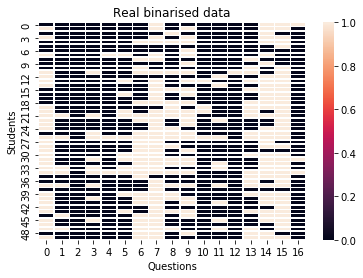

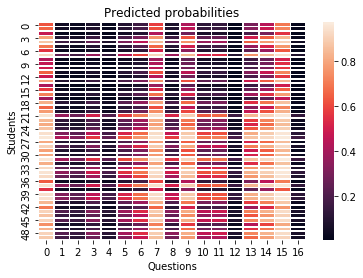

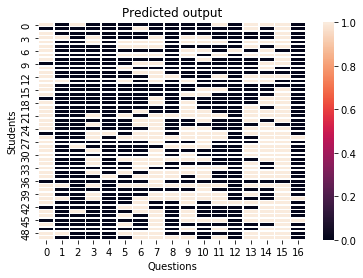

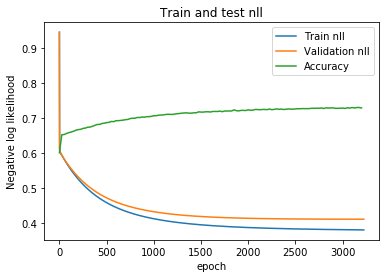

ADP vectorised (rate=0.00025, iters=3225, binarise=mid, shuffle=True) -> accuracy: 73.07960987091064, confusion matrix: 
[[49.82588235 13.76666667]
 [13.15372549 23.25372549]]


In [4]:
my_ADP1 = ADP(combined_ts, [0, 15000], [30, Q])
my_ADP1.run(learning_rate=0.00025, iters=3225)

In [5]:
print(my_ADP1.trained_bs)

tensor([-1.0616, -0.9212, -1.6808,  ...,  1.0323,  0.8184, -0.3894],
       requires_grad=True)


0 tensor(1194524.7500, grad_fn=<NegBackward0>) tensor(132735.3906, grad_fn=<NegBackward0>) 60.12784242630005
25 tensor(750390.5000, grad_fn=<NegBackward0>) tensor(83257.2188, grad_fn=<NegBackward0>) 65.26392102241516
50 tensor(735585.6875, grad_fn=<NegBackward0>) tensor(81783.9766, grad_fn=<NegBackward0>) 65.34313559532166
75 tensor(721626.1875, grad_fn=<NegBackward0>) tensor(80394.6562, grad_fn=<NegBackward0>) 65.65333604812622
100 tensor(708474.9375, grad_fn=<NegBackward0>) tensor(79085.9297, grad_fn=<NegBackward0>) 65.8823549747467
125 tensor(696093.8125, grad_fn=<NegBackward0>) tensor(77854.0547, grad_fn=<NegBackward0>) 66.05921387672424
150 tensor(684444.3125, grad_fn=<NegBackward0>) tensor(76695.2734, grad_fn=<NegBackward0>) 66.28745198249817
175 tensor(673488.1250, grad_fn=<NegBackward0>) tensor(75605.8125, grad_fn=<NegBackward0>) 66.56705737113953
200 tensor(663187.3750, grad_fn=<NegBackward0>) tensor(74581.9375, grad_fn=<NegBackward0>) 66.7521595954895
225 tensor(653504.7500, 

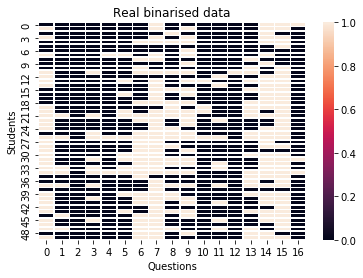

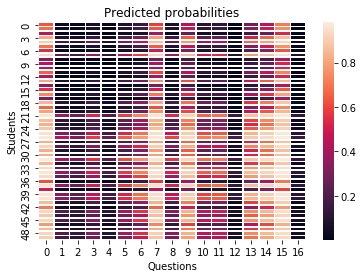

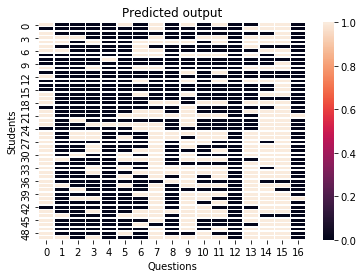

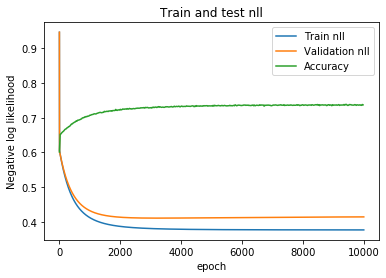

ADP vectorised (rate=0.00025, iters=10000, binarise=mid, shuffle=True) -> accuracy: 73.71372580528259, confusion matrix: 
[[50.20078431 13.39176471]
 [12.8945098  23.51294118]]


In [6]:
my_ADP2 = ADP(combined_ts, [0, 15000], [30, Q])
my_ADP2.run(learning_rate=0.00025, iters=10000)

0 tensor(1297151.7500, grad_fn=<NegBackward0>) tensor(143545.4062, grad_fn=<NegBackward0>) 59.734511375427246
25 tensor(750385.1250, grad_fn=<NegBackward0>) tensor(83264.6562, grad_fn=<NegBackward0>) 65.21960496902466
50 tensor(735579.7500, grad_fn=<NegBackward0>) tensor(81790.9922, grad_fn=<NegBackward0>) 65.61882495880127
75 tensor(721619.6250, grad_fn=<NegBackward0>) tensor(80401.5000, grad_fn=<NegBackward0>) 65.80235362052917
100 tensor(708467.6875, grad_fn=<NegBackward0>) tensor(79092.6094, grad_fn=<NegBackward0>) 66.11058712005615
125 tensor(696085.8125, grad_fn=<NegBackward0>) tensor(77860.5938, grad_fn=<NegBackward0>) 66.0725474357605
150 tensor(684435.6875, grad_fn=<NegBackward0>) tensor(76701.6641, grad_fn=<NegBackward0>) 66.44392013549805
175 tensor(673478.8750, grad_fn=<NegBackward0>) tensor(75612.0625, grad_fn=<NegBackward0>) 66.41882061958313
200 tensor(663177.3750, grad_fn=<NegBackward0>) tensor(74588.0547, grad_fn=<NegBackward0>) 66.5647029876709
225 tensor(653494.0625,

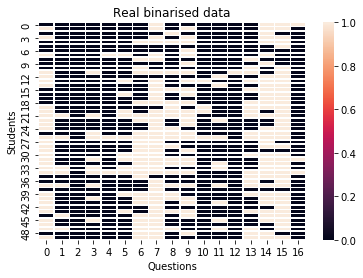

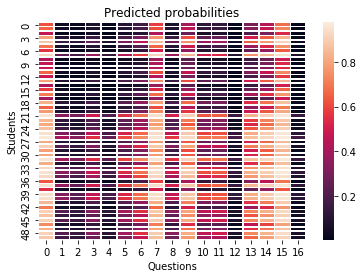

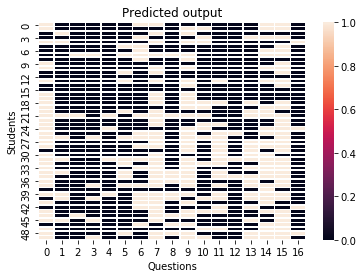

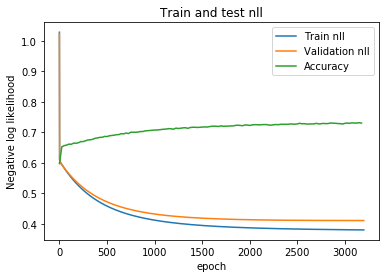

Interactive (rate=0.00025, iters=3200) -> accuracy: 73.08823466300964, confusion matrix: 
[[49.80196078 13.79058824]
 [13.12117647 23.28627451]]


In [7]:
my_I1 = I(combined_ts, [0, 15000], [30, Q])
my_I1.run(learning_rate=0.00025, iters=3200, dimension=1, validation=0.9)

0 tensor(1403218.5000, grad_fn=<NegBackward0>) tensor(156066.8438, grad_fn=<NegBackward0>) 59.09372568130493
25 tensor(750386.3750, grad_fn=<NegBackward0>) tensor(83268.1250, grad_fn=<NegBackward0>) 65.32823443412781
50 tensor(735579.6875, grad_fn=<NegBackward0>) tensor(81794.4844, grad_fn=<NegBackward0>) 65.50549268722534
75 tensor(721618.3125, grad_fn=<NegBackward0>) tensor(80404.8047, grad_fn=<NegBackward0>) 65.70156812667847
100 tensor(708465.0625, grad_fn=<NegBackward0>) tensor(79095.7344, grad_fn=<NegBackward0>) 65.77333211898804
125 tensor(696081.8125, grad_fn=<NegBackward0>) tensor(77863.5391, grad_fn=<NegBackward0>) 66.08940958976746
150 tensor(684430.2500, grad_fn=<NegBackward0>) tensor(76704.4453, grad_fn=<NegBackward0>) 66.33803844451904
175 tensor(673472., grad_fn=<NegBackward0>) tensor(75614.6719, grad_fn=<NegBackward0>) 66.4572536945343
200 tensor(663169.2500, grad_fn=<NegBackward0>) tensor(74590.5156, grad_fn=<NegBackward0>) 66.8560802936554
225 tensor(653484.5625, grad

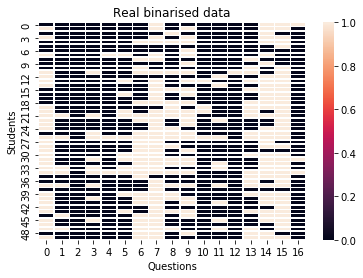

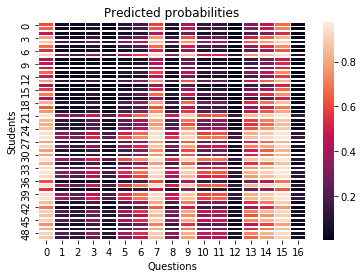

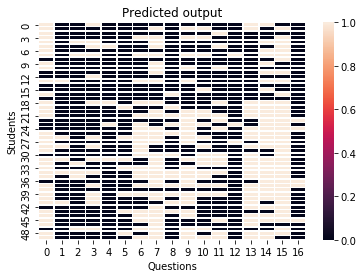

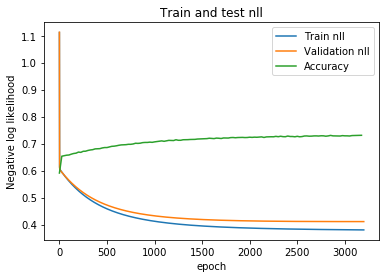

Interactive (rate=0.00025, iters=3200) -> accuracy: 72.95960783958435, confusion matrix: 
[[49.75176471 13.84078431]
 [13.19960784 23.20784314]]


In [8]:
my_I2 = I(combined_ts, [0, 15000], [30, Q])
my_I2.run(learning_rate=0.00025, iters=3200, dimension=2, validation=0.9)

In [12]:
print(my_I1.trained_bs)
print(my_I1.trained_bq)
print(my_I1.trained_xs)
print(my_I1.trained_xq)

tensor([-1.0751, -0.9196, -1.6930,  ...,  1.0472,  0.8277, -0.3761],
       requires_grad=True)
tensor([-0.1412, -2.4772, -0.2915, -0.7822, -5.0977, -3.2960,  1.2491, -2.3718,
        -0.6288, -1.0504, -1.6422,  2.2392, -2.3991,  0.1277, -1.2579, -1.0131,
        -0.0773,  0.1643, -0.2395, -2.7561,  2.3857,  3.2345, -0.7938, -2.2478,
         0.6603, -1.3783, -1.4305,  0.2395, -2.3503, -4.3087,  1.5782, -2.0354,
        -2.4636, -1.4596, -2.7981, -1.2038, -0.5771,  1.3886, -1.4080,  0.7329,
        -0.9271, -0.7998, -3.1597,  0.2174,  0.8338,  1.9013, -3.3420],
       requires_grad=True)
tensor([[ 1.4034, -0.1713,  1.5138,  ..., -0.8068, -0.6927, -1.1290]],
       requires_grad=True)
tensor([[-0.0438, -0.0189,  0.0076,  0.0361, -0.2012, -0.0192,  0.0244, -0.0357,
          0.0073,  0.0331,  0.0073,  0.0242,  0.0539,  0.0622, -0.0176, -0.0218,
          0.0086,  0.0351,  0.0155,  0.0255,  0.0166, -0.0041,  0.0149,  0.0450,
          0.0176, -0.0101,  0.1031, -0.0130, -0.0043,  0.1037, -

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [36]:
I1_bq = my_I1.trained_bq.detach().numpy()
I1_xq = my_I1.trained_xq.detach().numpy()[0]

X = np.array((I1_bq, I1_xq)).T
kmeans = KMeans(n_clusters=5, random_state=1000).fit(X)
y_pred = KMeans(n_clusters=5, random_state=1000).fit_predict(X)


[2 0 2 4 3 0 1 0 4 4 4 1 0 2 4 4 2 2 2 0 1 1 4 0 2 4 4 2 0 3 1 0 0 4 0 4 4
 1 4 2 4 4 0 2 2 1 0]
[2 0 2 4 0 0 1 2 4 1 3 2 1 0 2 2 2 1 3 2 1 4 1 0 1 2 0 1 2 2 0 0 0 1 2 2 0
 4 4 1 0 2 0 1 4 4 2]


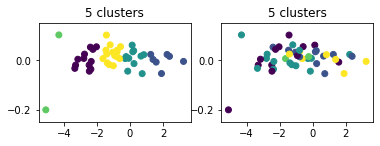

In [117]:
mapping = {'A':2, 'S':0, 'D':4, 'N':1, 'R':3}
actual_labels = []
for entry in category:
    actual_labels.append(mapping[entry])
actual_labels = np.array(actual_labels)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("5 clusters")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=actual_labels)
plt.title("5 clusters")

print(y_pred)
print(np.array(actual_labels))
# ['A' 'S' 'A' 'D' 'S' 'S' 'N' 'A' 'D' 'N' 'R' 'A' 'N' 'S' 'A' 'A' 'A' 'N'
#  'R' 'A' 'N' 'D' 'N' 'S' 'N' 'A' 'S' 'N' 'A' 'A' 'S' 'S' 'S' 'N' 'A' 'A'
#  'S' 'D' 'D' 'N' 'S' 'A' 'S' 'N' 'D' 'D' 'A']

[1 0 0 1 0 0 2 2 2 0 2 2 0 1 2 2 2 2 2 2 2 2 2 0 1 2 0 1 1 1 1 2 0 0 0 2 1
 1 0 1 0 2 0 0 2 1 0]
[2 0 2 2 0 0 1 0 2 2 2 1 0 2 2 2 2 2 2 0 1 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 2
 1 2 1 2 2 0 2 1 1 0]


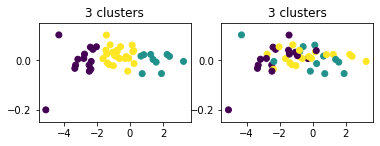

In [123]:
y_pred = KMeans(n_clusters=3, random_state=1000).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("3 clusters")

for i in range(len(diff)):
    if diff[i] == 3:
        diff[i] = 0
    if diff[i] == 1:
        diff[i] = -1
    if diff[i] == 2:
        diff[i] = -2

for i in range(len(diff)):
    if diff[i] == -2:
        diff[i] = 1
    if diff[i] == -1:
        diff[i] = 2
print(diff)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=diff)
plt.title("3 clusters")

print(y_pred)

[1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 1 1 0]
[1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0]


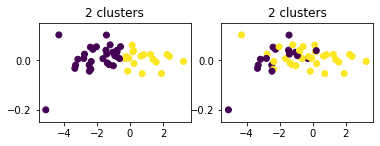

In [125]:
y_pred = KMeans(n_clusters=2, random_state=1000).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("2 clusters")

for i in range(len(diff)):
    if diff[i] == 2:
        diff[i] = 1
print(diff)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=diff-1)
plt.title("2 clusters")

print(y_pred)

In [120]:
print(I1_bq)
print(diff)

[-0.14117819 -2.477235   -0.29154843 -0.7821688  -5.0977015  -3.2960055
  1.249077   -2.371805   -0.62876195 -1.0503817  -1.6422286   2.2392378
 -2.39913     0.12772082 -1.257941   -1.0131491  -0.07731812  0.16432926
 -0.23945667 -2.7561302   2.3856661   3.2345467  -0.79375625 -2.2477796
  0.6602713  -1.3782905  -1.4305253   0.23947772 -2.3503017  -4.3087087
  1.5782086  -2.0354106  -2.4635525  -1.4595777  -2.7980914  -1.2038277
 -0.57711977  1.3886157  -1.4080293   0.7328835  -0.92710733 -0.79977906
 -3.1596944   0.2173725   0.8337844   1.9012798  -3.3420465 ]
[2 3 3 2 3 3 1 1 1 3 1 1 3 2 1 1 1 1 1 1 1 1 1 3 2 1 3 2 2 2 2 1 3 3 3 1 2
 2 3 2 3 1 3 3 1 2 3]


In [38]:
print(my_I2.trained_bs)
print(my_I2.trained_bq)
print(my_I2.trained_xs)
print(my_I2.trained_xq)
print(my_I2.trained_xq.shape)


tensor([-1.0610, -0.8955, -1.7015,  ...,  1.0508,  0.8791, -0.3393],
       requires_grad=True)
tensor([-0.1412, -2.4768, -0.2917, -0.7824, -5.0941, -3.2972,  1.2493, -2.3717,
        -0.6288, -1.0507, -1.6436,  2.2394, -2.3999,  0.1278, -1.2578, -1.0131,
        -0.0773,  0.1644, -0.2395, -2.7581,  2.3862,  3.2346, -0.7937, -2.2483,
         0.6609, -1.3788, -1.4316,  0.2397, -2.3503, -4.3141,  1.5790, -2.0362,
        -2.4638, -1.4600, -2.7986, -1.2046, -0.5773,  1.3883, -1.4083,  0.7322,
        -0.9276, -0.7997, -3.1603,  0.2179,  0.8335,  1.9022, -3.3433],
       requires_grad=True)
tensor([[ 1.3988, -0.1723,  1.5085,  ..., -0.4263, -0.9376, -2.8429],
        [ 0.8061,  0.8959, -0.0531,  ...,  0.3217,  1.6255, -0.1352]],
       requires_grad=True)
tensor([[-3.6070e-02, -1.2327e-02,  1.7250e-02,  4.3038e-02, -1.8431e-01,
         -5.7564e-03,  2.6158e-02, -2.4611e-02,  1.5688e-02,  4.1494e-02,
          1.7471e-02,  2.7337e-02,  6.2152e-02,  6.9516e-02, -1.3935e-02,
         -2.109

[1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0]
[2 0 2 4 0 0 1 2 4 1 3 2 1 0 2 2 2 1 3 2 1 4 1 0 1 2 0 1 2 2 0 0 0 1 2 2 0
 4 4 1 0 2 0 1 4 4 2]


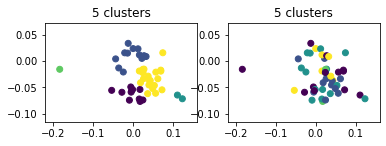

In [132]:
# I2_bq = my_I1.trained_bq.detach().numpy()
I2_xq = my_I2.trained_xq.detach().numpy()
X2 = I2_xq.T
# kmeans = KMeans(n_clusters=5, random_state=1000).fit(X)
y_pred2 = KMeans(n_clusters=5, random_state=1000).fit_predict(X2)

mapping = {'A':2, 'S':0, 'D':4, 'N':1, 'R':3}
actual_labels = []
for entry in category:
    actual_labels.append(mapping[entry])
actual_labels = np.array(actual_labels)

plt.subplot(221)
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred2)
plt.title("5 clusters")

plt.subplot(222)
plt.scatter(X2[:, 0], X2[:, 1], c=actual_labels)
plt.title("5 clusters")

print(y_pred)
print(np.array(actual_labels))